In [55]:
import numpy as np
import pandas as pd
import h5py
# Activate auto reload 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib ipympl
    
from pyccapt.calibration.data_tools import data_tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
filename = 'D:/pyccapt/tests/data/data_1642_Aug-30-2023_16-05_Al_test4/data_processing/data_1642_Aug-30-2023_16-05_Al_test4.h5'
df = data_tools.load_data(filename, data_type='pyccapt', mode='processed')
df

,x (nm),y (nm),z (nm),mc_c (Da),mc (Da),high_voltage (V),pulse,start_counter,t_c (ns),t (ns),x_det (cm),y_det (cm),pulse_pi,ion_pp
0,21.349402,5.363643,3.781171,27.092448,28.724681,5013.479980,1002.695984,4162,571.235437,616.458740,2.651428,0.666122,0,0
1,-22.845939,-1.205176,4.094125,26.948118,29.664233,5013.479980,1002.695984,4221,569.811044,627.266968,-2.847347,-0.150204,59,2
2,9.521428,1.577837,0.709855,26.994150,28.994070,5013.479980,1002.695984,4414,570.265747,605.204773,1.142857,0.189388,193,1
3,11.573396,1.761758,1.047097,26.998421,28.934313,5013.479980,1002.695984,4438,570.307919,606.110046,1.394286,0.212245,24,1
4,-10.820421,-14.684858,2.572101,27.333027,29.575221,5013.479980,1002.695984,4728,573.601335,619.249939,-1.325714,-1.799184,290,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316765,17.708551,13.272948,57.991811,28.297223,30.336661,6353.959961,1270.791992,8823,582.980918,560.408325,1.707755,1.280000,46,1
10316766,10.847843,-7.369646,56.044563,27.105522,29.042071,6353.959961,1270.791992,8970,571.364274,543.112427,1.028571,-0.698776,147,1
10316767,-16.910530,20.125206,59.249583,27.549218,30.381020,6353.959961,1270.791992,9039,575.718565,564.934631,-1.648980,1.962449,69,1
10316768,14.320546,-15.610074,57.737882,13.681184,14.419212,6353.959961,1270.791992,9654,416.828667,398.833862,1.377959,-1.502041,346,1


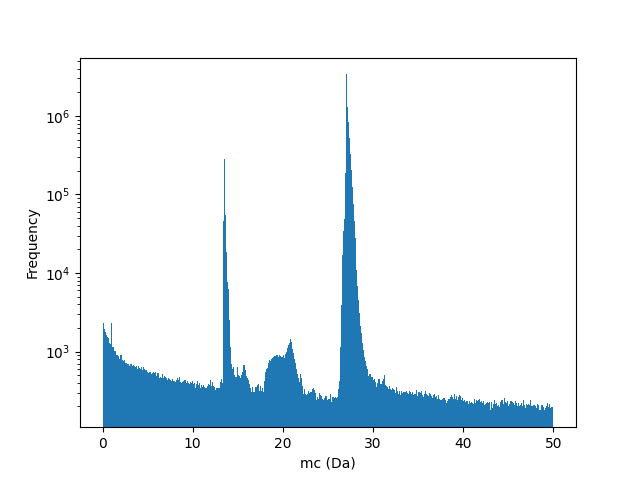

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting the histogram
mc = df['mc_c (Da)'].to_numpy()
mc = mc[mc < 50]
# mc = mc[mc > 26]
fig, ax = plt.subplots()
bin_width = 0.1
bins = np.linspace(np.min(mc), np.max(mc), round(np.max(mc) / bin_width))
y, x, patches = ax.hist(mc, bins)
# Adding labels and title
plt.xlabel('mc (Da)')
plt.ylabel('Frequency')
ax.set_yscale('log')

# Show the plot
plt.show()

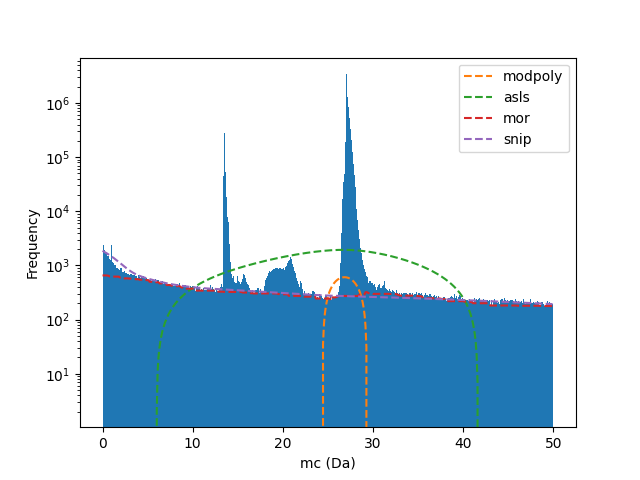

In [61]:
import pybaselines
bkg_1 = pybaselines.polynomial.modpoly(y, x[:-1], poly_order=4)[0]
bkg_2 = pybaselines.whittaker.asls(y, lam=1e7, p=0.02)[0]
bkg_3 = pybaselines.morphological.mor(y, half_window=30)[0]
bkg_4 = pybaselines.smooth.snip(y, max_half_window=40, decreasing=True, smooth_half_window=3)[0]

fig, ax = plt.subplots()
bin_width = 0.1
bins = np.linspace(np.min(mc), np.max(mc), round(np.max(mc) / bin_width))
y, x, patches = ax.hist(mc, bins)
# Adding labels and title
plt.xlabel('mc (Da)')
plt.ylabel('Frequency')
ax.set_yscale('log')

plt.plot(x[:-1], bkg_1, '--', label='modpoly')
plt.plot(x[:-1], bkg_2, '--', label='asls')
plt.plot(x[:-1], bkg_3, '--', label='mor')
plt.plot(x[:-1], bkg_4, '--', label='snip')

plt.legend()
plt.show()

In [ ]:
half_window_1 = 15
half_window_2 = 45
fit_1, params_1 = baseline_fitter.std_distribution(y, half_window_1, smooth_half_window=10)
fit_2, params_2 = baseline_fitter.std_distribution(y, half_window_2, smooth_half_window=10)

fig, ax = plt.subplots()
bin_width = 0.1
bins = np.linspace(np.min(mc), np.max(mc), round(np.max(mc) / bin_width))
y, x, patches = ax.hist(mc, bins)
# Adding labels and title
plt.xlabel('mc (Da)')
plt.ylabel('Frequency')
ax.set_yscale('log')
plt.plot(x, fit_1, label=f'half_window={half_window_1}')
plt.plot(x, fit_2, '--', label=f'half_window={half_window_2}')
plt.legend()
plt.show()

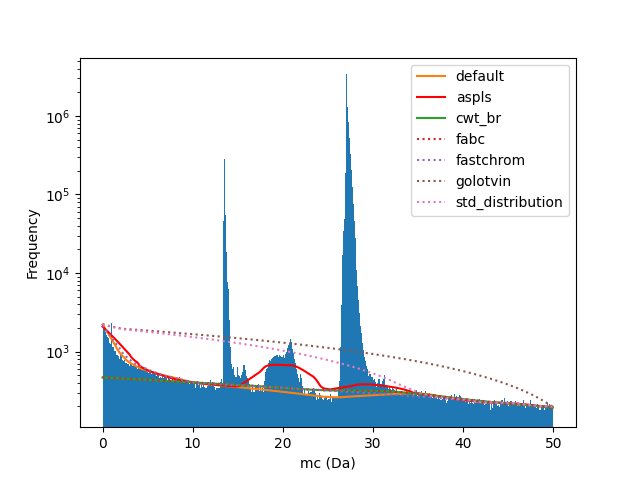

In [95]:
from skimage.filters import threshold_triangle as custom_threshold
from pybaselines import Baseline
fig, ax = plt.subplots()
bin_width = 0.1
bins = np.linspace(np.min(mc), np.max(mc), round(np.max(mc) / bin_width))
y, x, patches = ax.hist(mc, bins)
# Adding labels and title
plt.xlabel('mc (Da)')
plt.ylabel('Frequency')
ax.set_yscale('log')

half_window_1 = 30
half_window_2 = 15

baseline_fitter = Baseline(x_data=x[:-1])
fit_1, params_1 = baseline_fitter.fastchrom(y, half_window_2)
fit_2, params_2 = baseline_fitter.fastchrom(y, half_window_1, threshold=custom_threshold)


# fit_3, params_3 = pybaselines.classification.cwt_br(y)
fit_4, params_4 = pybaselines.classification.dietrich(y)
fit_5, params_5 = pybaselines.classification.fabc(y, lam=1e6, num_std=3.0)
fit_6, params_6 = pybaselines.classification.fastchrom(y)
fit_7, params_7 = pybaselines.classification.golotvin(y)
fit_8, params_8 = pybaselines.classification.std_distribution(y)



plt.plot(x[:-1], fit_1, label='default')
plt.plot(x[:-1], fit_2, label='aspls', color='red')
plt.plot(x[:-1], fit_3, ':', label='cwt_br')
# plt.plot(x[:-1], fit_4, ':', label='dietrich')
plt.plot(x[:-1], fit_5, ':', label='fabc')
plt.plot(x[:-1], fit_6, ':', label='fastchrom')
plt.plot(x[:-1], fit_7, ':', label='golotvin')
plt.plot(x[:-1], fit_8, ':', label='std_distribution')
plt.legend()
plt.show()

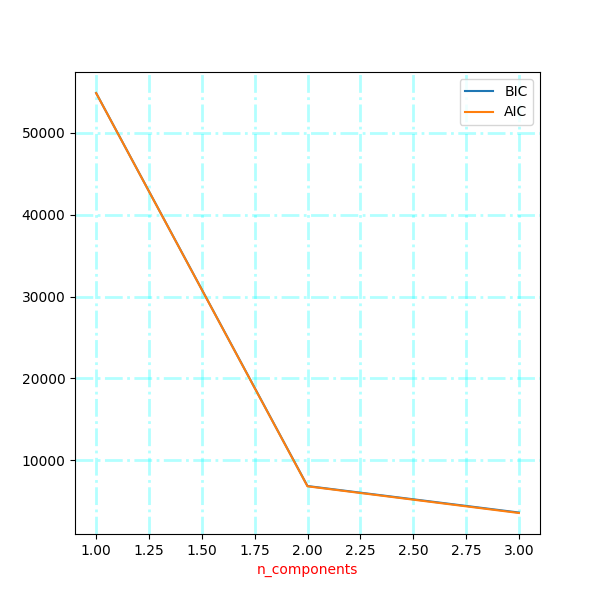

Number of components is: 2


In [103]:
# GMM number of componnents
from sklearn import mixture

tt = np.expand_dims(mc, axis=1)
tt = np.float32(tt)

mask = np.random.randint(0, len(tt), 10000)
tt = tt[mask]

n_components = np.arange(1, 4)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(tt)
          for n in n_components]

fig1, ax1 = plt.subplots(figsize=(6, 6))
bic_test = [m.bic(tt) for m in models]
aic_test = [m.aic(tt) for m in models]
plt.plot(n_components, bic_test, label='BIC')
plt.plot(n_components, aic_test, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components', color='r')
plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
plt.show()
n_components = min(np.argmin(bic_test), np.argmin(aic_test))
print('Number of components is:', n_components)

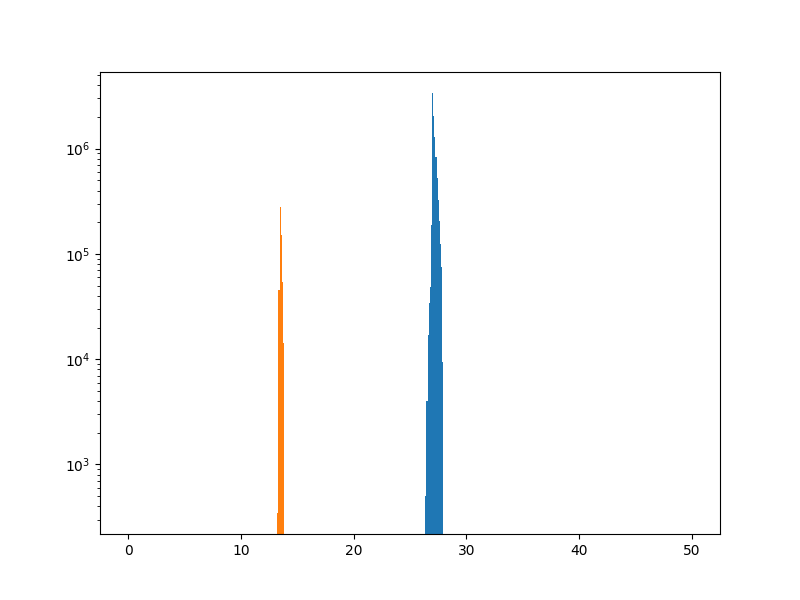

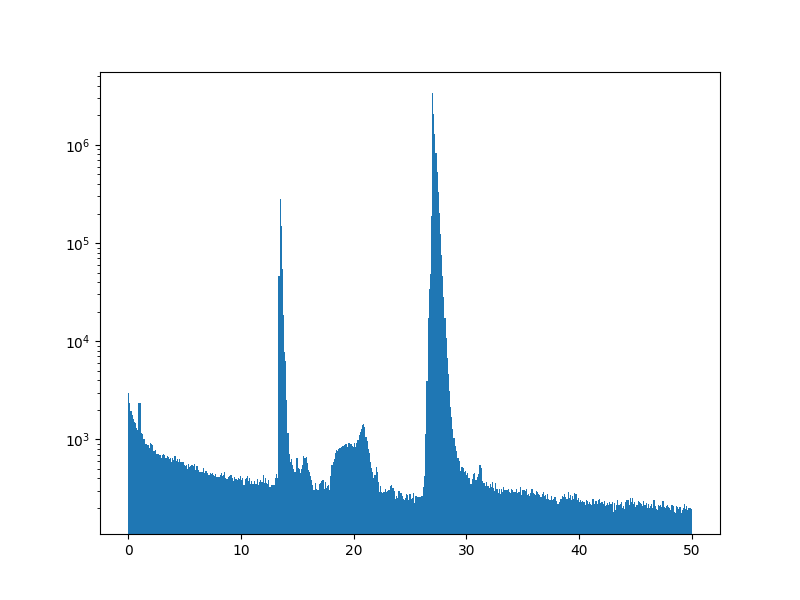

In [104]:
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=3, covariance_type='diag').fit(tt)

mc_g = np.expand_dims(mc, axis=1)
mc_g = np.float32(mc_g)
labels = gmm.predict(mc_g)



fig1, ax1 = plt.subplots(figsize=(8, 6))
bins = 0.1
bins = np.linspace(np.min(mc_g), np.max(mc_g), round(np.max(mc_g) / bins))
plt.hist(mc, bins, log=True)
fig1, ax1 = plt.subplots(figsize=(8, 6))

for i in range(n_components):
    A = mc_g[labels==i]
    plt.hist(A, bins, log=True)
plt.show()

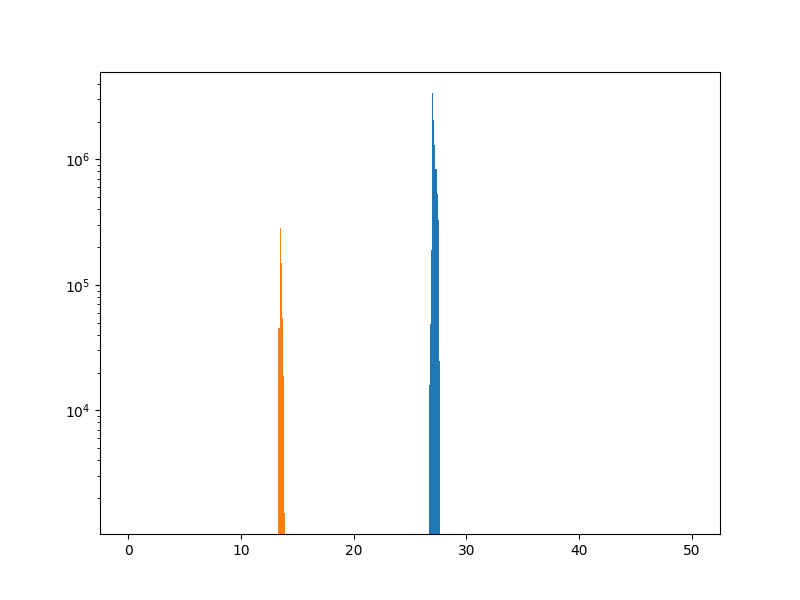

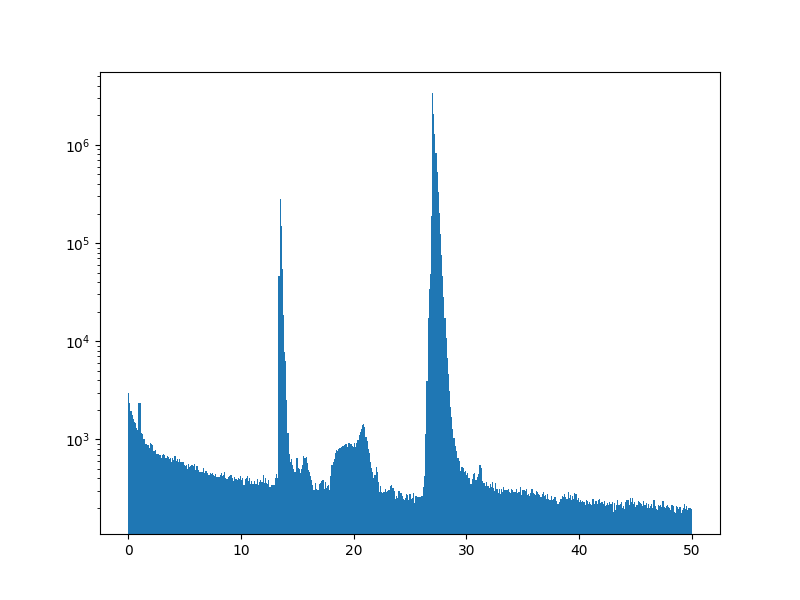

In [98]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import numpy as np

# Assuming tt is your data, mc is your feature, and n_components is the number of clusters
m_shift = MeanShift(bandwidth=0.1).fit(tt)

mc_g = np.expand_dims(mc, axis=1)
mc_g = np.float32(mc_g)
labels = m_shift.predict(mc_g)



fig1, ax1 = plt.subplots(figsize=(8, 6))
bins = 0.1
bins = np.linspace(np.min(mc_g), np.max(mc_g), round(np.max(mc_g) / bins))
plt.hist(mc, bins, log=True)
fig1, ax1 = plt.subplots(figsize=(8, 6))
for i in range(n_components):
    A = mc_g[labels==i]
    plt.hist(A, bins, log=True)
plt.show()


In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

n_components=4

mc_g = np.expand_dims(mc, axis=1)
mc_g = np.float32(mc_g)


# Standardize the data
tt = StandardScaler().fit_transform(tt)

# K-Means clustering
kmeans = KMeans(n_clusters=n_components, random_state=42)
kmeans_labels = kmeans.fit(tt)
kmeans_labels = kmeans.predict(mc_g)
num_kmeans_labels = len(np.unique(kmeans_labels))

# Agglomerative Hierarchical clustering
# agg_clustering = AgglomerativeClustering(n_clusters=n_components)
# agg_labels = agg_clustering.fit_predict(mc_g)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(mc_g)
num_dbscan_labels = len(np.unique(dbscan_labels))

# GMM clustering (as you've already implemented)
gmm = GaussianMixture(n_components=n_components, covariance_type='diag').fit(tt)
gmm_labels = gmm.predict(mc_g)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# K-Means

axes[0, 0].set_title('K-Means Clustering')
for i in range(num_kmeans_labels):
    A = mc_g[kmeans_labels==i]
    axes[0, 0].hist(A, bins, log=True)
# # Agglomerative Hierarchical
# for i in range(n_components):
#     A = mc_g[agg_labels==i]
#     axes[0, 1].hist(A, bins, log=True)
# axes[0, 1].set_title('Agglomerative Clustering')

# DBSCAN
for i in range(num_dbscan_labels):
    A = mc_g[dbscan==i]
    axes[1, 0].hist(A, bins, log=True)
axes[1, 0].set_title('DBSCAN Clustering')

# GMM
for i in range(n_components):
    A = mc_g[gmm_labels==i]
    axes[1, 1].hist(A, bins, log=True)
axes[1, 1].set_title('GMM Clustering')

plt.tight_layout()
plt.show()


C:\Users\APTUser\.conda\envs\oxcart5\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MemoryError: 